## Implementation of Adam Optimization from Scratch with Algorithm Comparison in Python


This Python script demonstrates various optimization techniques used to minimize the Rastrigin function, a test function often used to evaluate optimization algorithms due to its non-linear, oscillatory nature, which presents numerous local minima. By comparing four optimization algorithms—**Stochastic Gradient Descent (SGD)**, **SGD with Momentum**, **RMSprop**, and **Adam**—we can observe how each method handles the function's complex landscape and converges toward a global minimum.

The script utilizes **NumPy** for numerical computations, **Matplotlib** for visualization, and **mpl_toolkits.mplot3d** for 3D plotting.


<!-- Display logos of NumPy and Matplotlib side by side -->

<table>
  <tr>
    <td><img src="download.png" alt="NumPy Logo" width="200"/></td>
    <td><img src="matplotlib.png" alt="Matplotlib Logo" width="200"/></td>
    <td><img src="mpl.png" alt="Matplotlib Logo" width="200"/></td>
  </tr>
</table>

Below is a detailed breakdown of each section of the code, functions, and the logic behind the optimization algorithms.


# Library Descriptions

- **NumPy (`np`)**: Supports multi-dimensional arrays and mathematical functions for optimization.
- **Matplotlib (`plt`)**: Used for plotting optimization paths and comparing algorithm convergence.
- **Seed Function**: Ensures reproducibility by initializing the random number generator.
- **mpl_toolkits.mplot3d (`Axes3D`)**: Enables 3D plotting to visualize the Rastrigin function surface.


In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from mpl_toolkits.mplot3d import Axes3D

### Defining the Objective Function using the command def: Rastrigin Function

The Rastrigin function is a widely used objective function for testing optimization algorithms, known for its challenging landscape due to multiple local minima. It is defined as:

$$ f(x, y) = 20 + (x^2 - 10 \cdot \cos(2 \pi x)) + (y^2 - 10 \cdot \cos(2 \pi y)) $$



In [2]:
# Define the objective function (Rastrigin function) to minimize
def objective(x, y):
    # Rastrigin function is commonly used for testing optimization algorithms
    return 20 + (x**2 - 20 * np.cos(2 * np.pi * x)) + (y**2 - 20 * np.cos(2 * np.pi * y))

### Derivative of the Rastrigin Function

This function computes the gradient (partial derivatives) of the Rastrigin objective function with respect to the variables \( x \) and \( y \). The partial derivatives are calculated as follows:

$$\frac{\partial f(x, y)}{\partial x} = 2x + 10\pi \sin(2\pi x)$$

$$\frac{\partial f(x, y)}{\partial y} = 2y + 10\pi \sin(2\pi y)$$


These derivatives represent the rate of change of the Rastrigin function along the \( x \)-axis and \( y \)-axis, respectively. The gradient is returned as a numpy array, which can be used to guide optimization algorithms in searching for the minimum of the Rastrigin function.


In [3]:
# Define the derivative of the objective function
def derivative(x, y):
    # Gradient (partial derivatives) of the Rastrigin function with respect to x and y
    dx = 2 * x + 10 * np.pi * np.sin(2 * np.pi * x)
    dy = 2 * y + 10 * np.pi * np.sin(2 * np.pi * y)
    # Return the gradient as an array
    return np.array([dx, dy])

### Stochastic Gradient Descent (SGD) Implementation

Stochastic Gradient Descent (SGD) is an optimization algorithm used to minimize an objective function by iteratively updating the variables in the direction of the negative gradient. The update rule is given by:

$$ x_{t+1} = x_t - \alpha \cdot \nabla f(x_t) $$

Where:
- `x_t` is the current position (variables `x` and `y`),
- `α` is the learning rate (step size),
- `∇f(x_t)` is the gradient of the objective function at the current position.



The algorithm continues for a set number of iterations, updating the variables at each step to converge toward the minimum.


In [4]:
# Stochastic Gradient Descent (SGD) implementation
def sgd(objective, derivative, bounds, n_iter, alpha):
    solutions = []  # List to store the solutions at each iteration
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])  # Initialize x randomly within bounds
    
    for t in range(n_iter):  # Loop over the number of iterations
        g = derivative(x[0], x[1])  # Calculate gradient of the objective function at the current position
        x -= alpha * g  # Update the current position using gradient descent
        solutions.append(x.copy())  # Store the updated solution for analysis
    
    return solutions  # Return all the solutions collected during the optimization






### Stochastic Gradient Descent (SGD) with Momentum

SGD with Momentum enhances standard SGD by adding a momentum term, which helps the algorithm converge faster and reduces oscillations in complex landscapes.

**Update Rules**:
1. **Momentum Update**:
   $$ v_{t+1} = \beta * v_t + (1 - \beta) * \nabla(x_t) $$
   - where:
     - `beta` is the momentum coefficient, controlling the influence of previous momentum.
     - `∇f(x_t)` is the gradient of the objective function at the current position `x_t`.

2. **Position Update**:
    $$ x_{t+1} = x_t - \alpha * v_{t+1} $$
   - where:
     - `α` is the learning rate (step size), determining how much to adjust by the momentum-adjusted gradient.

Momentum helps SGD accumulate speed in consistent directions, leading to smoother and faster convergence, especially useful in optimization problems with many local minima.


In [5]:
# SGD with Momentum implementation
def sgd_momentum(objective, derivative, bounds, n_iter, alpha, beta):
    solutions = []  # List to store the solutions at each iteration
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])  # Initialize x randomly within bounds
    v = np.zeros_like(x)  # Initialize the momentum vector to zeros
    
    for t in range(n_iter):  # Loop over the number of iterations
        g = derivative(x[0], x[1])  # Calculate gradient of the objective function at the current position
        v = beta * v + (1 - beta) * g  # Update momentum (weighted average of previous momentum and current gradient)
        x -= alpha * v  # Update the current position using momentum-adjusted gradient
        solutions.append(x.copy())  # Store the updated solution for analysis
    
    return solutions  # Return all the solutions collected during the optimization

### RMSprop Optimization Algorithm

RMSprop is an optimization algorithm designed to adaptively adjust the learning rate for each parameter, which helps improve convergence in complex optimization problems.

**Update Rules**:

1. **Squared Gradient Average Update**:
   $$ v = \beta_2 v + (1 - \beta_2) g^2 $$
   - where:
     - `beta2` controls the decay rate of the moving average of squared gradients.
     - `g` is the current gradient of the objective function.

2. **Position Update**:
   $$ x = x - \alpha \frac{g}{\sqrt{v} + \epsilon} $$
   - where:
     - `alpha` is the learning rate (step size).
     - `eps` is a small constant to avoid division by zero.

RMSprop helps normalize the step size based on the variance of recent gradients, improving stability and convergence, especially in problems with complex or noisy landscapes.

In [6]:
# RMSprop implementation
def rmsprop(objective, derivative, bounds, n_iter, alpha, beta2, eps=1e-8):
    solutions = []  # List to store the solutions at each iteration
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])  # Initialize x randomly within bounds
    v = np.zeros_like(x)  # Initialize the squared gradient average to zeros
    
    for t in range(n_iter):  # Loop over the number of iterations
        g = derivative(x[0], x[1])  # Calculate gradient of the objective function at the current position
        v = beta2 * v + (1 - beta2) * g ** 2  # Update the squared gradient average using the current gradient
        x -= alpha * g / (np.sqrt(v) + eps)  # Update the current position using the normalized gradient
        solutions.append(x.copy())  # Store the updated solution for analysis
    
    return solutions  # Return all the solutions collected during the optimization

### Adam Optimization Algorithm

Adam combines momentum and adaptive learning rates to efficiently optimize parameters.

**Update Rules**:

1. **First Moment Estimate (m)**:
   $$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$

2. **Second Moment Estimate (v)**:
   $$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$$

3. **Bias Correction**:
   $$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$
   $$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

4. **Parameter Update**:
   $$x_t = x_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

Where:
- `α`: Learning rate
- `β₁, β₂`: Exponential decay rates for moment estimates
- `g_t`: Gradient at step `t`
- `ε`: Small constant for numerical stability

The algorithm iterates over `n_iter` steps, updating `x` using the above rules and tracking progress via the objective function.


In [7]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # List to store solutions at each iteration
    solutions = []
    
    # Generate an initial point within the specified bounds
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    
    # Evaluate the initial point's score (objective function value)
    score = objective(x[0], x[1])
    
    # Initialize first (m) and second (v) moments as arrays of zeros
    m = np.zeros(bounds.shape[0])
    v = np.zeros(bounds.shape[0])
    
    # Iterate for the specified number of optimization steps
    for t in range(n_iter):
        # Calculate the gradient (partial derivatives) at the current point
        g = derivative(x[0], x[1])
        
        # Update each parameter in the bounds (here assuming 2D optimization)
        for i in range(bounds.shape[0]):
            # Update the biased first moment estimate, m(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            
            # Update the biased second moment estimate, v(t)
            v[i] = beta2 * v[i] + (1.0 - beta2) * (g[i] ** 2)
            
            # Compute bias-corrected first moment estimate, mhat(t)
            mhat = m[i] / (1.0 - beta1 ** (t + 1))
            
            # Compute bias-corrected second moment estimate, vhat(t)
            vhat = v[i] / (1.0 - beta2 ** (t + 1))
            
            # Update the parameter using the Adam update rule
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + eps)
        
        # Evaluate the objective function at the new point
        score = objective(x[0], x[1])
        
        # Store the current solution for tracking progress
        solutions.append(x.copy())
        
        # Print the progress of the optimization at the current iteration
        print('>%d f(%s) = %.5f' % (t, x, score))
    
    # Return the list of all solutions across iterations
    return solutions

In [8]:
# Set random seed for reproducibility of results
seed(1)

# Define range for input space (bounds)
bounds = np.array([[-5.0, 5.0], [-5.0, 5.0]])  # X and Y bounds for optimization

# Define parameters for optimization algorithms
n_iter = 100  # Number of iterations
alpha = 0.05  # Learning rate
beta1 = 0.9  # Adam's first moment coefficient
beta2 = 0.999  # Adam's second moment coefficient
beta_momentum = 0.9  # Momentum coefficient for SGD with Momentum
beta_rmsprop = 0.9  # Decay rate for RMSprop

# Perform the optimization with each algorithm
sgd_solutions = sgd(objective, derivative, bounds, n_iter, alpha)  # SGD optimization
sgd_momentum_solutions = sgd_momentum(objective, derivative, bounds, n_iter, alpha, beta_momentum)  # SGD with Momentum optimization
rmsprop_solutions = rmsprop(objective, derivative, bounds, n_iter, alpha, beta_rmsprop)  # RMSprop optimization
adam_solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)  # Adam optimization

>0 f([-3.08739789 -1.59439273]) = 31.59899
>1 f([-3.03827746 -1.64117995]) = 25.13412
>2 f([-2.99172808 -1.68830794]) = 19.38760
>3 f([-2.95067771 -1.73619932]) = 14.40568
>4 f([-2.91861135 -1.78493041]) = 9.90854
>5 f([-2.89772117 -1.83436887]) = 5.63885
>6 f([-2.88791448 -1.88408187]) = 1.72225
>7 f([-2.88760208 -1.93312402]) = -1.40143
>8 f([-2.89477014 -1.97976116]) = -3.32474
>9 f([-2.90748424 -2.0213935 ]) = -3.99515
>10 f([-2.92397923 -2.05515087]) = -3.79941
>11 f([-2.9425953  -2.07906913]) = -3.31390
>12 f([-2.96170094 -2.0927611 ]) = -2.97050
>13 f([-2.97967959 -2.09707452]) = -2.95468
>14 f([-2.99502436 -2.09341556]) = -3.29037
>15 f([-3.0065249  -2.08330459]) = -3.92616
>16 f([-3.01345057 -2.06820506]) = -4.76169
>17 f([-3.0156224  -2.04950107]) = -5.64970
>18 f([-3.01335262 -2.02852894]) = -6.41397
>19 f([-3.00731619 -2.00661028]) = -6.89119
>20 f([-2.99842435 -1.98505445]) = -6.97991
>21 f([-2.98772741 -1.96511297]) = -6.67381
>22 f([-2.97633728 -1.94789024]) = -6.06403
>

- **Random Seed Initialization (`seed(1)`)**: Sets a fixed seed for random number generation to ensure reproducibility and consistent results across multiple runs.
  
- **Input Bounds Definition (`np.array([[-5.0, 5.0], [-5.0, 5.0]])`)**: Uses `numpy` to define the input space bounds for the optimization variables (e.g., X and Y).

- **Algorithm Parameters**: Defines optimization parameters like learning rate (`alpha`), momentum coefficients (`beta1`, `beta2`), and decay rates (`beta_momentum`, `beta_rmsprop`) that control algorithm behavior.

- **Optimization Function Calls**: Utilizes Python functions (`sgd`, `sgd_momentum`, `rmsprop`, `adam`) to perform the optimization, adjusting parameters iteratively to minimize the objective function.

- **Modular Approach**: Implements modular code where each optimization method can be independently tested and reused.


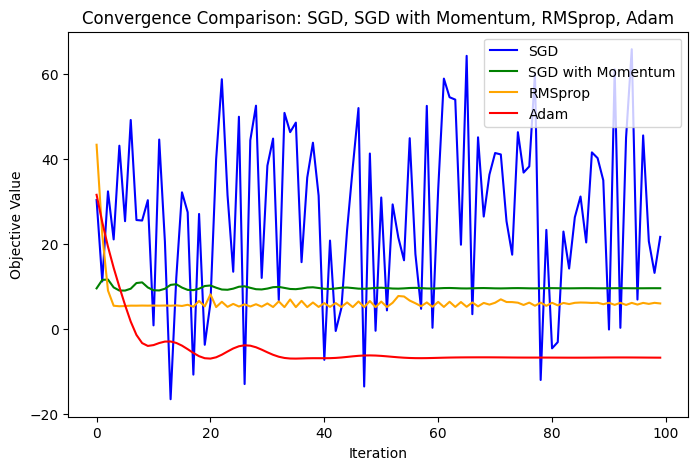

In [9]:

# Convergence plot: Objective value vs. Iteration
plt.figure(figsize=(8, 5))  # Create a figure for the convergence plot
plt.plot(np.arange(n_iter), [objective(*sol) for sol in sgd_solutions], label="SGD", color='blue')  # Plot SGD convergence
plt.plot(np.arange(n_iter), [objective(*sol) for sol in sgd_momentum_solutions], label="SGD with Momentum", color='green')  # Plot SGD with Momentum convergence
plt.plot(np.arange(n_iter), [objective(*sol) for sol in rmsprop_solutions], label="RMSprop", color='orange')  # Plot RMSprop convergence
plt.plot(np.arange(n_iter), [objective(*sol) for sol in adam_solutions], label="Adam", color='red')  # Plot Adam convergence
plt.xlabel('Iteration')  # Label for x-axis
plt.ylabel('Objective Value')  # Label for y-axis
plt.title('Convergence Comparison: SGD, SGD with Momentum, RMSprop, Adam')  # Title for the plot
plt.legend()  # Add legend for the plot
plt.show()  # Display the plot

- **Figure Setup (`plt.figure(figsize=(8, 5))`)**: Initializes a plot with a size of 8x5 inches for better visualization.

- **Plotting the Convergence**: 
  - The objective value is calculated for each optimization algorithm at each iteration.
  - `np.arange(n_iter)` generates iteration numbers from 0 to `n_iter-1`.
  - `objective(*sol)` computes the objective value for each solution in the respective algorithm.

- **Labels and Title**:
  - `plt.xlabel('Iteration')` and `plt.ylabel('Objective Value')` set the axis labels.
  - `plt.title('Convergence Comparison: SGD, SGD with Momentum, RMSprop, Adam')` adds a plot title.

- **Legend (`plt.legend()`)**: Differentiates the algorithms in the plot.

- **Display (`plt.show()`)**: Displays the plot to visualize the convergence behavior of the optimization algorithms.


In [10]:
# Final objective value after optimization
final_sgd_value = objective(*sgd_solutions[-1])  # Final objective value for SGD
final_sgd_momentum_value = objective(*sgd_momentum_solutions[-1])  # Final objective value for SGD with Momentum
final_rmsprop_value = objective(*rmsprop_solutions[-1])  # Final objective value for RMSprop
final_adam_value = objective(*adam_solutions[-1])  # Final objective value for Adam

print(f"Final objective value for SGD: {final_sgd_value}")  # Print final SGD value
print(f"Final objective value for SGD with Momentum: {final_sgd_momentum_value}")  # Print final SGD with Momentum value
print(f"Final objective value for RMSprop: {final_rmsprop_value}")  # Print final RMSprop value
print(f"Final objective value for Adam: {final_adam_value}")  # Print final Adam value

Final objective value for SGD: 21.68993590508435
Final objective value for SGD with Momentum: 9.594357867372105
Final objective value for RMSprop: 6.009828139282213
Final objective value for Adam: -6.760192118077651


- **Final Objective Value Calculation**:
  - `final_sgd_value = objective(*sgd_solutions[-1])`: Computes the objective value for the last solution in the SGD optimization.
  - `final_sgd_momentum_value = objective(*sgd_momentum_solutions[-1])`: Computes the objective value for the last solution in SGD with Momentum.
  - `final_rmsprop_value = objective(*rmsprop_solutions[-1])`: Computes the objective value for the last solution in RMSprop.
  - `final_adam_value = objective(*adam_solutions[-1])`: Computes the objective value for the last solution in Adam.

- **Print Statements**:
  - Prints the final objective value for each optimization algorithm (SGD, SGD with Momentum, RMSprop, and Adam).



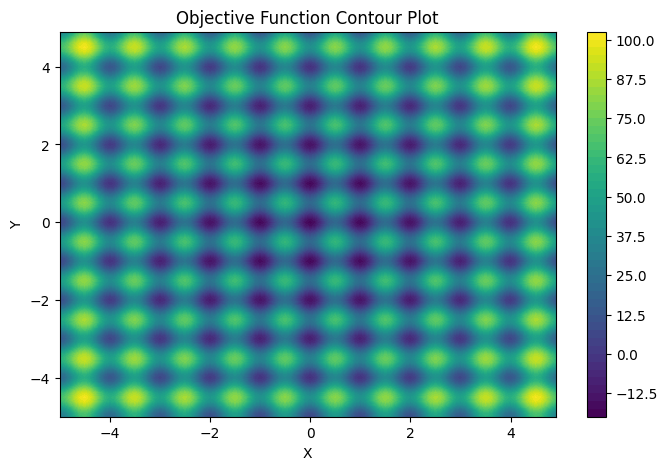

In [11]:
# Create a meshgrid for contour plot
xaxis = np.arange(bounds[0, 0], bounds[0, 1], 0.1)  # Create a grid for X-axis
yaxis = np.arange(bounds[1, 0], bounds[1, 1], 0.1)  # Create a grid for Y-axis
x, y = np.meshgrid(xaxis, yaxis)  # Create meshgrid for contour plot
results = objective(x, y)  # Evaluate objective function on the meshgrid
# Plotting the contour of the objective function
plt.figure(figsize=(8, 5))  # Create a figure for the contour plot
plt.contourf(x, y, results, levels=50, cmap='viridis')  # Plot contour of the objective function
plt.colorbar()  # Show color bar for contour plot
plt.title('Objective Function Contour Plot')  # Title for the contour plot
plt.xlabel('X')  # X-axis label
plt.ylabel('Y')  # Y-axis label
plt.show()  # Display the contour plot

- **Meshgrid Creation**:
  - `xaxis = np.arange(bounds[0, 0], bounds[0, 1], 0.1)`: Defines the range for the X-axis.
  - `yaxis = np.arange(bounds[1, 0], bounds[1, 1], 0.1)`: Defines the range for the Y-axis.
  - `x, y = np.meshgrid(xaxis, yaxis)`: Creates a meshgrid of X and Y coordinates for evaluating the objective function.

- **Objective Function Evaluation**:
  - `results = objective(x, y)`: Evaluates the objective function over the meshgrid of X and Y.

- **Contour Plotting**:
  - `plt.figure(figsize=(8, 5))`: Creates the plot with a size of 8x5 inches.
  - `plt.contourf(x, y, results, levels=50, cmap='viridis')`: Plots the contour with 50 levels and 'viridis' color map.
  - `plt.colorbar()`: Adds a color bar to the plot.
  - `plt.title('Objective Function Contour Plot')`: Adds a title to the plot.
  - `plt.xlabel('X')` and `plt.ylabel('Y')`: Labels the X-axis and Y-axis.
  - `plt.show()`: Displays the contour plot.

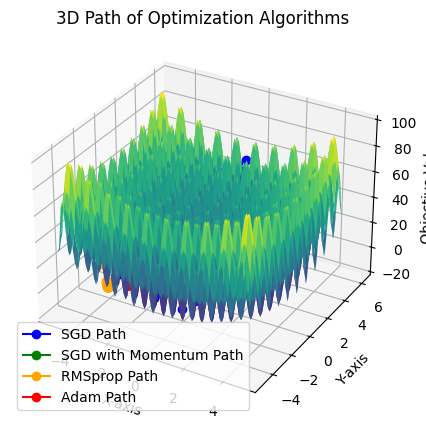

In [12]:
# Plot the optimization paths in 3D
fig = plt.figure(figsize=(8, 5))  # Create a 3D plot figure
ax = fig.add_subplot(111, projection='3d')  # Set 3D projection for the plot

# Create the 3D surface plot of the objective function
ax.plot_surface(x, y, results, cmap='viridis', edgecolor='none')  # Plot surface of the objective function

# Plot the optimization paths in 3D
ax.plot(np.array(sgd_solutions)[:, 0], np.array(sgd_solutions)[:, 1], [objective(*sol) for sol in sgd_solutions], 'o-', color='blue', label="SGD Path")  # Plot SGD path in 3D
ax.plot(np.array(sgd_momentum_solutions)[:, 0], np.array(sgd_momentum_solutions)[:, 1], [objective(*sol) for sol in sgd_momentum_solutions], 'o-', color='green', label="SGD with Momentum Path")  # Plot SGD with Momentum path in 3D
ax.plot(np.array(rmsprop_solutions)[:, 0], np.array(rmsprop_solutions)[:, 1], [objective(*sol) for sol in rmsprop_solutions], 'o-', color='orange', label="RMSprop Path")  # Plot RMSprop path in 3D
ax.plot(np.array(adam_solutions)[:, 0], np.array(adam_solutions)[:, 1], [objective(*sol) for sol in adam_solutions], 'o-', color='red', label="Adam Path")  # Plot Adam path in 3D

# Labels and legend for 3D plot
ax.set_xlabel('X-axis')  # Label for x-axis
ax.set_ylabel('Y-axis')  # Label for y-axis
ax.set_zlabel('Objective Value')  # Label for z-axis
ax.set_title('3D Path of Optimization Algorithms')  # Title for the 3D plot
ax.legend()  # Add legend to the 3D plot

plt.show()  # Display the 3D plot

- **3D Plot Setup**:
  - `fig = plt.figure(figsize=(8, 5))`: Creates a 3D plot figure with a size of 8x5 inches.
  - `ax = fig.add_subplot(111, projection='3d')`: Sets the plot as a 3D projection.

- **Surface Plot**:
  - `ax.plot_surface(x, y, results, cmap='viridis', edgecolor='none')`: Plots the surface of the objective function in 3D with the 'viridis' color map and no edge color.

- **Optimization Paths**:
  - `ax.plot(np.array(sgd_solutions)[:, 0], np.array(sgd_solutions)[:, 1], [objective(*sol) for sol in sgd_solutions], 'o-', color='blue', label="SGD Path")`: Plots the SGD optimization path in 3D.
  - `ax.plot(np.array(sgd_momentum_solutions)[:, 0], np.array(sgd_momentum_solutions)[:, 1], [objective(*sol) for sol in sgd_momentum_solutions], 'o-', color='green', label="SGD with Momentum Path")`: Plots the SGD with Momentum path in 3D.
  - `ax.plot(np.array(rmsprop_solutions)[:, 0], np.array(rmsprop_solutions)[:, 1], [objective(*sol) for sol in rmsprop_solutions], 'o-', color='orange', label="RMSprop Path")`: Plots the RMSprop path in 3D.
  - `ax.plot(np.array(adam_solutions)[:, 0], np.array(adam_solutions)[:, 1], [objective(*sol) for sol in adam_solutions], 'o-', color='red', label="Adam Path")`: Plots the Adam path in 3D.

- **Labels and Legend**:
  - `ax.set_xlabel('X-axis')`: Labels the x-axis.
  - `ax.set_ylabel('Y-axis')`: Labels the y-axis.
  - `ax.set_zlabel('Objective Value')`: Labels the z-axis (objective value).
  - `ax.set_title('3D Path of Optimization Algorithms')`: Adds a title to the plot.
  - `ax.legend()`: Adds a legend to the plot.

- **Display**:
  - `plt.show()`: Displays the 3D plot.